In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib as plt

print(" -> read measurement IDs")
df1 = pd.read_excel('INPUT_prot.xlsx', index_col=None, header=None)
df_trace = df1#[52487497, 52487496]


print(df_trace)
res = {}
mIDX = 1
for MID in df_trace.iloc[:,0]:
    print(" -> Request Results from Ripe (ID: ", MID, ")")
    r = requests.get('https://atlas.ripe.net/api/v2/measurements/'+str(MID)+'/results')
    res[mIDX] = r.json()
    mIDX = mIDX + 1

 -> read measurement IDs
           0      1   2
0   52487497  trace  v6
1   52487496  trace  v4
2   52487426   http  v6
3   52487425   http  v4
4   52487409    ntp  v6
5   52487408    ntp  v4
6   52487405    dns  v6
7   52487404    dns  v4
8   52487407    ssl  v6
9   52487406    ssl  v4
10  52487237   ping  v4
11  52487236   ping  v6
 -> Request Results from Ripe (ID:  52487497 )
 -> Request Results from Ripe (ID:  52487496 )
 -> Request Results from Ripe (ID:  52487426 )
 -> Request Results from Ripe (ID:  52487425 )
 -> Request Results from Ripe (ID:  52487409 )
 -> Request Results from Ripe (ID:  52487408 )
 -> Request Results from Ripe (ID:  52487405 )
 -> Request Results from Ripe (ID:  52487404 )
 -> Request Results from Ripe (ID:  52487407 )
 -> Request Results from Ripe (ID:  52487406 )
 -> Request Results from Ripe (ID:  52487237 )
 -> Request Results from Ripe (ID:  52487236 )


In [3]:
arrHTTPv4 = []
arrHTTPv6 = []
arrNTPv4 = []
arrNTPv6 = []
arrSSLv4 = []
arrSSLv6 = []
arrDNSv4 = []
arrDNSv6 = []
arrPingv4 = []
arrPingv6 = []
def storeHTTP(item):
    print("got HTTP item", item)
    print(item['result'][0]['rt'])
    if item.get('result') is not None:
        if item['result'][0]['rt'] < 280 and item['result'][0]['af'] == 4:
            arrHTTPv4.append(item['result'][0]['rt'])
        if item['result'][0]['rt'] < 280 and item['result'][0]['af'] == 6:
            arrHTTPv6.append(item['result'][0]['rt'])

def storeNTP(item):
    #print("gor NTP item", item)
    #print(item['result'][0]['rt'])
    if item['result'][0]['rt'] < 280 and item['result'][0]['af'] == 4:
        arrNTPv4.append(item['result'][0]['rt'])
    if item['result'][0]['rt'] < 280 and item['result'][0]['af'] == 6:
        arrNTPv6.append(item['result'][0]['rt'])

def storeSSL(item):
    #print("gor SSL item", item)
    #print(item['result'][0]['rt'])
    if item.get("rt") is not None:
        if item['rt'] < 280 and item['af'] == 4:
            arrSSLv4.append(item['rt'])
        if item['rt'] < 280 and item['af'] == 6:
            arrSSLv6.append(item['rt'])
    else:
        print("error on:", item)
def storeDNS(item):
    #print("gor DNS item", item)
    #print(item['result'][0]['rt'])
    if item['result']['rt'] < 280 and item['af'] == 4:
        arrDNSv4.append(item['result']['rt'])
    if item['result']['rt'] < 280 and item['af'] == 6:
        arrDNSv6.append(item['result']['rt'])

def storePing(item):
    #print("gor DNS item", item)
    #print(item['result'][0]['rt'])
    if item['avg'] < 280 and item['af'] == 4:
        arrPingv4.append(item['avg'])
    if item['avg'] < 280 and item['af'] == 6:
        arrPingv6.append(item['avg'])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



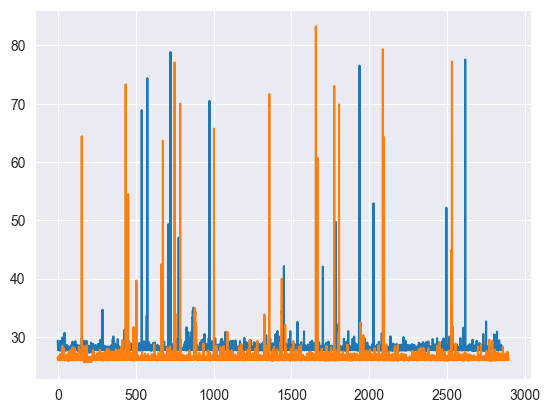

In [4]:
import matplotlib.pyplot as plt
cnt = 1
print(type(res))
for series in res.items():
    for item in series[1]:
        #print("insert ", cnt , " of ", len(res), "in ", MID,item)
        try:
            if str(item['type'] )== str('http'):
                if item.get("error") is None:
                    storeHTTP(item)
                else:
                    print("raw:",item)
            if str(item['type'] )== str('ntp'):
                if item.get("error") is None:
                    storeNTP(item)
            if str(item['type'] )== str('dns'):
                if item.get("error") is None:
                    storeDNS(item)
            if str(item['type'] )== str('sslcert'):
                if item.get("error") is None:
                    storeSSL(item)
            if str(item['type'] )== str('ping'):
                if item.get("error") is None:
                    storePing(item)
            cnt = cnt + 1
        except:
            print("invalid data")
            exit(1)
#print("http req: ",len(arrHTTPv4))
plt.plot(arrPingv4)
plt.plot(arrPingv6)
plt.show()

3262
3167
3174
3205
2854
2896
3157
3248
<class 'list'>


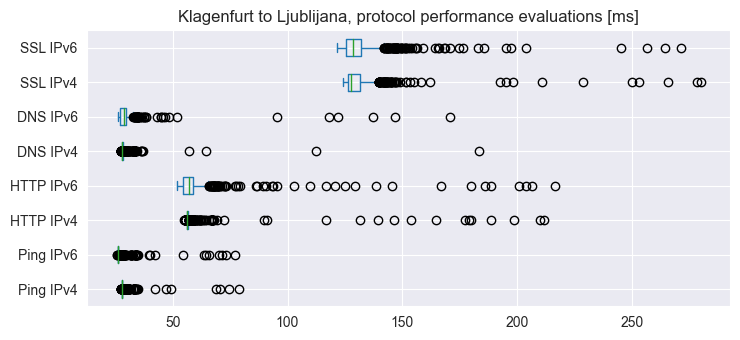

In [6]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
print(len(arrDNSv6))
print(len(arrDNSv4))
print(len(arrSSLv6))
print(len(arrSSLv4))
print(len(arrPingv4))
print(len(arrPingv6))
print(len(arrHTTPv4))
print(len(arrHTTPv6))
data = pd.DataFrame({"Ping IPv4": arrPingv4[:1600], "Ping IPv6": arrPingv6[:1600],
                     "HTTP IPv4": arrHTTPv4[:1600], "HTTP IPv6": arrHTTPv6[:1600],
                     "DNS IPv4": arrDNSv4[:1600], "DNS IPv6": arrDNSv6[:1600],
                     "SSL IPv4": arrSSLv4[:1600], "SSL IPv6": arrSSLv6[:1600]
                     })

# Plot the dataframe 'NTP IPv4', 'NTP IPv6'
ax = data[['Ping IPv4', 'Ping IPv6','HTTP IPv4', 'HTTP IPv6', 'DNS IPv4', 'DNS IPv6','SSL IPv4', 'SSL IPv6']].plot(kind='box', title='Klagenfurt to Ljublijana, protocol performance evaluations [ms]', vert=False)

# Display the plot
print(type(arrHTTPv4))
#plt.show()
plt.savefig('out/ProtPerfArnes.png', dpi=300)

In [7]:
ser = pd.Series(arrSSLv4)
print(ser.describe())

ser = pd.Series(arrSSLv6)
print(ser.describe())


count    3205.000000
mean      129.832679
std         9.130175
min       124.118673
25%       126.451559
50%       127.534079
75%       131.522025
max       279.936570
dtype: float64
count    3174.000000
mean      130.305597
std         9.786317
min       120.620840
25%       125.584821
50%       128.718783
75%       132.077512
max       274.351557
dtype: float64
